In [1]:
import pandas as pd

In [2]:
solar_consumption=pd.read_csv('Consumo_fotovoltaica.csv')
grid_consumption=pd.read_csv('Consumo.csv')
solar_gen=pd.read_csv('Generacion_fotovoltaica.csv')
weather=pd.read_csv('Meteorologia.csv')

In [3]:
solar_gen.isna().sum()
solar_consumption.isna().sum()

# The only dataset with considerable amount of null values is Generacion_fotovoltaica.csv with 1164 nulls in TOTAL_KWH_ENERGIA

FECHA                0
TOTAL_KWH_ENERGIA    0
dtype: int64

In [4]:
# We can try to impute the missing solar gen data by using the weather data

solar_consumption['FECHA']=pd.to_datetime(solar_consumption['FECHA'].apply(lambda x: x[:-6]))
grid_consumption['FECHA']=pd.to_datetime(grid_consumption['FECHA'])
solar_gen['FECHA']=pd.to_datetime(solar_gen['FECHA'])
weather['FORECAST_TIMESTAMP']=pd.to_datetime(weather['FORECAST_TIMESTAMP'].apply(lambda x: x[:-6]))

data = weather.merge(solar_gen, how='left', left_on='FORECAST_TIMESTAMP', right_on='FECHA')
data = data.drop(columns=['FECHA']).set_index('FORECAST_TIMESTAMP')

In [5]:
data.sample(5)

,LATITUDE,LONGITUDE,10uheightAboveGround_10,10vheightAboveGround_10,2rheightAboveGround_2,2shheightAboveGround_2,2theightAboveGround_2,SUNSDsurface_0,aptmpheightAboveGround_2,dlwrfsurface_0,...,tccatmosphere_0,theightAboveGround_80,tmaxheightAboveGround_2,tminheightAboveGround_2,tozneatmosphereSingleLayer_0,tpsurface_0,tsurface_0,uheightAboveGround_80,vheightAboveGround_80,TOTAL_KWH_ENERGIA
FORECAST_TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2024-01-29 14:00:00,40.25,-3.75,-3.068457,-0.400645,50.1,0.005439,287.708770,7200.0,287.680054,303.849023,...,100.0,286.461895,287.712051,286.318555,294.158203,0.000,290.988623,-3.517764,-0.362935,94.44
2023-12-13 15:00:00,40.50,-3.50,2.917949,-1.647529,46.5,0.004003,283.992188,10800.0,283.971143,267.257721,...,24.7,282.848379,284.149824,283.782578,311.242603,0.000,285.462988,3.457522,-2.182563,79.93
2024-01-02 19:00:00,40.00,-3.50,1.972427,1.749163,89.3,0.006659,281.915879,0.0,280.378589,328.000000,...,100.0,282.269570,282.235879,281.807090,281.725488,0.000,281.444165,3.846262,2.502888,NaN
2023-10-25 09:00:00,40.25,-3.50,8.669390,2.516357,83.8,0.009114,287.553945,7125.0,287.531445,375.325494,...,75.5,286.642012,287.554082,286.467754,275.976074,0.125,287.799170,11.433345,2.993130,0.79
2024-05-29 19:00:00,40.00,-4.00,0.863330,-1.393889,25.3,0.006871,302.602832,3600.0,301.083435,362.600366,...,5.0,304.396719,305.137329,302.520557,329.049829,0.000,299.534277,1.019358,-1.515098,NaN


<Axes: >

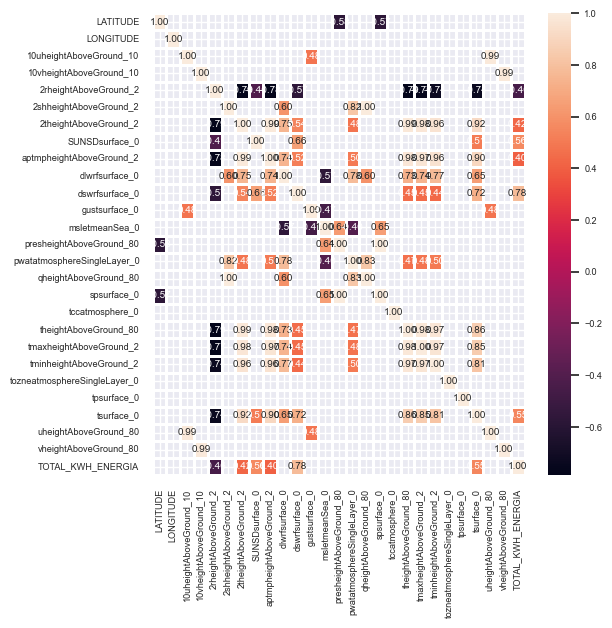

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()
sns.set_theme(font_scale=0.6)

high_corr = corr_matrix[abs(corr_matrix) > 0.4]
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(high_corr, annot=True, fmt=".2f", linewidths=1, ax=ax)


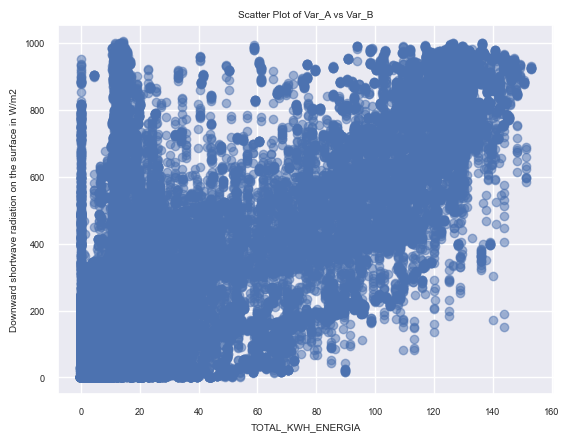

In [7]:
import matplotlib.pyplot as plt

# Sample data
x = data['TOTAL_KWH_ENERGIA']
y = data['dswrfsurface_0']

# Scatter plot
plt.scatter(x, y, alpha=0.5)
plt.xlabel("TOTAL_KWH_ENERGIA")
plt.ylabel("Downward shortwave radiation on the surface in W/m2")
plt.title("Scatter Plot of Var_A vs Var_B")
plt.show()

In [8]:
import plotly.express as px

px.line(solar_gen,x='FECHA',y='TOTAL_KWH_ENERGIA')

## KNN Impute

In [9]:
from sklearn.impute import KNNImputer
import pandas as pd

imputer = KNNImputer(n_neighbors=2)
df_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns, index=data.index)


In [10]:
px.line(solar_gen,x='FECHA',y='TOTAL_KWH_ENERGIA', color_discrete_sequence=['red'])

## Huber Regressor Impute

In [11]:
data.columns

Index(['LATITUDE', 'LONGITUDE', '10uheightAboveGround_10',
       '10vheightAboveGround_10', '2rheightAboveGround_2',
       '2shheightAboveGround_2', '2theightAboveGround_2', 'SUNSDsurface_0',
       'aptmpheightAboveGround_2', 'dlwrfsurface_0', 'dswrfsurface_0',
       'gustsurface_0', 'msletmeanSea_0', 'presheightAboveGround_80',
       'pwatatmosphereSingleLayer_0', 'qheightAboveGround_80', 'spsurface_0',
       'tccatmosphere_0', 'theightAboveGround_80', 'tmaxheightAboveGround_2',
       'tminheightAboveGround_2', 'tozneatmosphereSingleLayer_0',
       'tpsurface_0', 'tsurface_0', 'uheightAboveGround_80',
       'vheightAboveGround_80', 'TOTAL_KWH_ENERGIA'],
      dtype='object')

In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import HuberRegressor


# Splitting data into training (known A values) and missing values
train_df = data.dropna(subset=['TOTAL_KWH_ENERGIA'])
test_df = data[data['TOTAL_KWH_ENERGIA'].isnull()]

# Fit a robust regression model
model = HuberRegressor()
model.fit(train_df[['dswrfsurface_0']], train_df['TOTAL_KWH_ENERGIA'])

# Predict missing values
data.loc[data['TOTAL_KWH_ENERGIA'].isnull(), 'TOTAL_KWH_ENERGIA'] = model.predict(test_df[['dswrfsurface_0']])


,LATITUDE,LONGITUDE,10uheightAboveGround_10,10vheightAboveGround_10,2rheightAboveGround_2,2shheightAboveGround_2,2theightAboveGround_2,SUNSDsurface_0,aptmpheightAboveGround_2,dlwrfsurface_0,...,tccatmosphere_0,theightAboveGround_80,tmaxheightAboveGround_2,tminheightAboveGround_2,tozneatmosphereSingleLayer_0,tpsurface_0,tsurface_0,uheightAboveGround_80,vheightAboveGround_80,TOTAL_KWH_ENERGIA
FORECAST_TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2023-07-24 11:00:00,40.0,-4.0,6.989717,1.524463,19.6,0.005070,301.667859,18000.0,300.244031,318.407690,...,0.8,298.878662,301.632129,291.701489,324.006396,0.0,316.100012,7.979102,1.763457,74.431072
2023-07-24 12:00:00,40.0,-4.0,7.526357,1.301797,18.4,0.005260,303.365576,21600.0,301.470923,323.107690,...,1.7,300.500000,303.363452,291.701489,325.803369,0.0,318.700000,8.801675,1.623066,115.660000
2023-07-24 13:00:00,40.0,-4.0,8.506143,1.294370,18.2,0.005665,304.854614,3600.0,302.703198,357.800000,...,8.8,301.995581,304.815100,303.400000,326.096606,0.0,319.277295,9.977305,1.662959,129.980000
2023-07-24 14:00:00,40.0,-4.0,9.392205,1.283123,17.4,0.005709,305.681506,7200.0,303.544031,362.248730,...,5.0,302.944043,305.689685,303.400000,326.790967,0.0,318.515942,11.152161,1.711703,134.350000
2023-07-24 15:00:00,40.0,-4.0,10.167048,1.555879,18.3,0.006080,305.976172,10800.0,303.834607,365.100000,...,35.8,303.432275,305.995581,303.400000,329.955933,0.0,316.435266,12.256921,2.011133,133.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-31 19:00:00,40.5,-3.5,-1.515610,0.914978,60.0,0.007987,290.736934,0.0,290.747119,375.545221,...,56.6,290.670273,290.899238,290.726934,295.502661,0.0,289.097119,-2.300679,2.322466,-0.187675
2024-10-31 20:00:00,40.5,-3.5,-0.758618,1.620525,63.8,0.007911,289.628125,0.0,289.591248,350.300110,...,65.8,290.036563,290.899238,289.630059,295.607007,0.0,287.037329,-0.981880,2.815010,-0.187675
2024-10-31 21:00:00,40.5,-3.5,-0.599971,1.527935,66.9,0.007852,288.801836,0.0,288.833850,337.404614,...,35.9,289.335586,290.899238,288.800527,294.524219,0.0,285.914941,-0.491460,2.447852,-0.187675
